In [96]:
# Import libs
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:
# Import CSVs
order_list = pd.read_csv("list_of_orders.csv")
order_details = pd.read_csv("order_details.csv")
sales_target = pd.read_csv("sales_target.csv")
pd.options.display.max_columns = 100


In [3]:
# Listing columns for visulisation
order_list.head(3)

,Order ID,Order Date,CustomerName,State,City
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad
1,B-25602,01-04-2018,Pearl,Maharashtra,Pune
2,B-25603,03-04-2018,Jahan,Madhya Pradesh,Bhopal


In [4]:
order_details.head(3)

,Order ID,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,66.0,-12.0,5,Clothing,Stole
2,B-25601,8.0,-2.0,3,Clothing,Hankerchief


In [5]:
sales_target.head(3)

,Month of Order Date,Category,Target
0,Apr-18,Furniture,10400.0
1,May-18,Furniture,10500.0
2,Jun-18,Furniture,10600.0


Using the Order ID as an index, the date of the order, the State and City from the "list of orders" dataset can be found. Furthermore, using the Order ID, the Amount of the order, the Profit made, and the Category, can be found. From the Category and Date, the % to target/% over target, can be found. From all the above, the State and City with the highest amount of orders can be found, as can the highest performing categories.

In [50]:
# Merge "list of orders" and "order details"

df = pd.merge(order_list, order_details, on="Order ID")
df.head(3)


,Order ID,Order Date,CustomerName,State,City,Amount,Profit,Quantity,Category,Sub-Category
0,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,1275.0,-1148.0,7,Furniture,Bookcases
1,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,66.0,-12.0,5,Clothing,Stole
2,B-25601,01-04-2018,Bharat,Gujarat,Ahmedabad,8.0,-2.0,3,Clothing,Hankerchief


In [51]:
df.dtypes

Order ID         object
Order Date       object
CustomerName     object
State            object
City             object
Amount          float64
Profit          float64
Quantity          int64
Category         object
Sub-Category     object
dtype: object

In [8]:
df.shape

(1500, 10)

In [9]:
# Checking for missing values
(df.isna().sum()/len(df))*100

Order ID        0.0
Order Date      0.0
CustomerName    0.0
State           0.0
City            0.0
Amount          0.0
Profit          0.0
Quantity        0.0
Category        0.0
Sub-Category    0.0
dtype: float64

As there are no missing values, imputation was not required.

In [52]:
# Cleaning and transformation functions

df.dropna(subset=["Order ID"], inplace=True)
df["Order ID"] = df["Order ID"].astype('string')
df["State"] = df["State"].astype("category")
df["City"] = df["City"].astype('string')
sales_target = sales_target.rename(columns={'Month of Order Date': 'Order Date'})
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d-%m-%Y").dt.strftime("%m-%Y")
df = df.drop('CustomerName', axis=1)

In [54]:

# sales_target['Order Date'] = pd.to_datetime(sales_target['Order Date'], format='%b-%y').dt.strftime('%m-%Y')
sales_target.head()

,Order Date,Category,Target
0,04-2018,Furniture,10400.0
1,05-2018,Furniture,10500.0
2,06-2018,Furniture,10600.0
3,07-2018,Furniture,10800.0
4,08-2018,Furniture,10900.0


In [55]:
df.dtypes

Order ID        string[python]
Order Date              object
State                 category
City            string[python]
Amount                 float64
Profit                 float64
Quantity                 int64
Category                object
Sub-Category            object
dtype: object

# The Questions
## Question 1
Question: What is the total sales and profit for each category and sub-category?
Analysis: By merging the "order_details.csv" and "list_of_orders.csv" datasets based on the "Order ID" column, we can calculate the total sales and profit for each category and sub-category. This analysis will provide insights into the revenue generated and profitability of different product categories.
## Question 2
Question: Is there a correlation between the sales target and the actual sales achieved for each month?
Analysis: By comparing the "Sales_target.csv" and "list_of_orders.csv" datasets based on the "Month of Order Date" column, we can determine the correlation between the sales target and the actual sales achieved. This analysis can help assess the effectiveness of the sales target setting and identify any patterns or trends in sales performance.
## Question 3
Question (Prediction): Can we predict the future sales based on historical data?
Analysis: Using historical data from the "list_of_orders.csv" dataset, we can build a predictive model to forecast future sales. By applying regression or time series analysis techniques, we can train the model on past sales patterns and make predictions for future periods. This analysis will provide insights into potential sales trends and assist in making informed business decisions.

# Analysis
## Question 1
Question: What is the total sales and profit for each category and sub-category?
Analysis: By merging the "order_details.csv" and "list_of_orders.csv" datasets based on the "Order ID" column, we can calculate the total sales and profit for each category and sub-category. This analysis will provide insights into the revenue generated and profitability of different product categories.


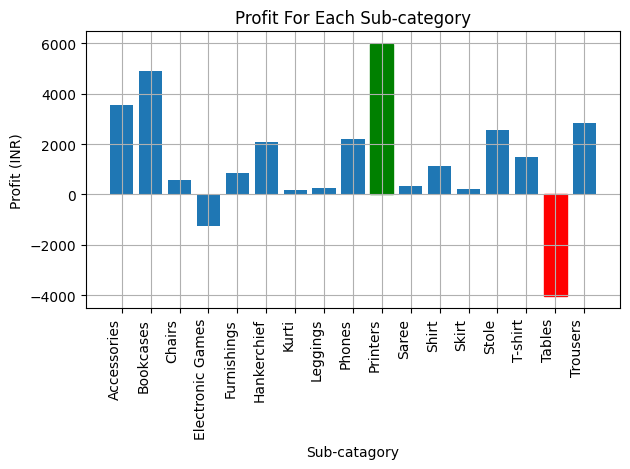

In [56]:

category_profit = df.groupby('Sub-Category')['Profit'].sum().reset_index()
subcat_profit = category_profit['Sub-Category']
profit_profit = category_profit['Profit']
highest_index = np.argmax(profit_profit)
lowest_index = np.argmin(profit_profit)
fig, ax = plt.subplots()
bars = ax.bar(subcat_profit, profit_profit)
bars[highest_index].set_color('green')
bars[lowest_index].set_color('red')

plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.title("Profit For Each Sub-category")
plt.xlabel("Sub-catagory")
plt.ylabel("Profit (INR)")
plt.tight_layout()
plt.grid()
plt.show()

## Graph Analysis
Based on the graphical representation, it is evident that the sub-category exhibiting the highest performance is "Printers," while the sub-category demonstrating the lowest performance is "Tables." Consequently, it can be inferred that the overarching category of 'Furniture' represents the lowest performing category, while 'Electronics' stands out as the highest performing category.

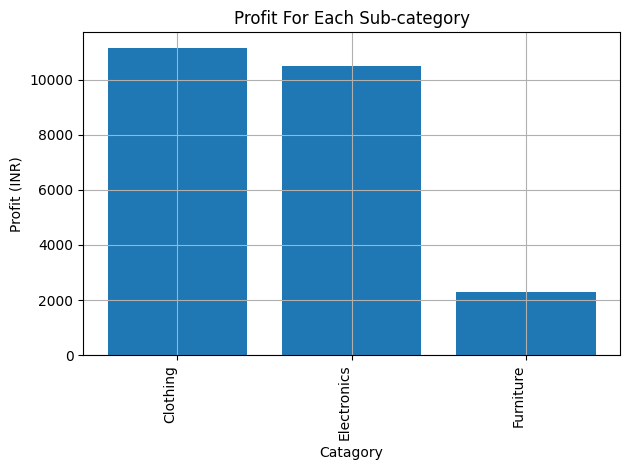

In [57]:
category_profit = df.groupby('Category')['Profit'].sum().reset_index()
subcat_profit = category_profit['Category']
profit_profit = category_profit['Profit']
plt.bar(subcat_profit, profit_profit)
plt.xticks(rotation=90, ha='right')  # Rotate and align x-axis labels
plt.tight_layout()
plt.title("Profit For Each Sub-category")
plt.xlabel("Catagory")
plt.ylabel("Profit (INR)")
plt.tight_layout()
plt.grid()
plt.show()

As can be seen by the above graph, the initial prediction that the 'Furniture' category performs the worse was true, however, it can be seen that despite being the worst, 'Furniture' still produces a profit. It can be inferred that either there are more furniture subcategories to offset the loss, or profits on other furniture subcategories are higher than furniture.

In [115]:
subcategory_category = df.sort_values(by='Category')
subcategory_category = subcategory_category.drop(columns=['Order ID', 'Order Date', 'State', 'City', 'Amount', 'Profit', 'Quantity'])
subcategory_count = subcategory_category.groupby('Category')['Sub-Category'].nunique()
subcategory_count = subcategory_count.reset_index().rename(columns={'Sub-Category': 'Category Count'})
print(subcategory_count)

      Category  Category Count
0     Clothing               9
1  Electronics               4
2    Furniture               4


The graphical representation above illustrates the distribution of the 17 distinct sub-categories. It is evident that my initial assumption regarding the prevalence of furniture subcategories was proven incorrect. Consequently, our focus will now shift towards assessing the profitability of the various subcategories within each overarching category.

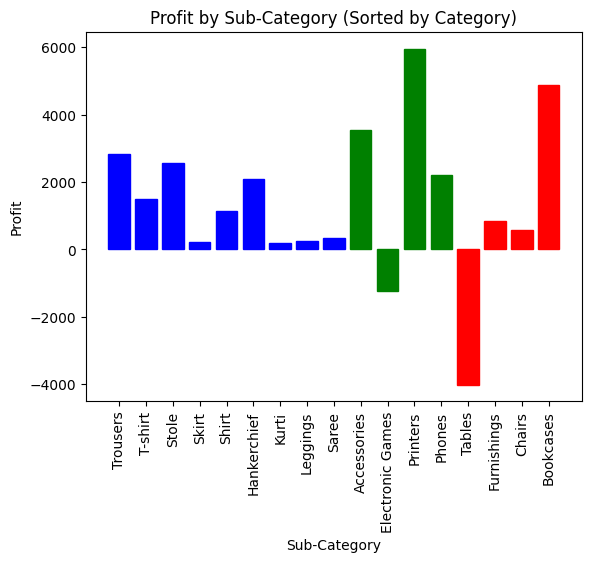

In [76]:
profit_subcategory = df.sort_values(by='Category')
profit_subcategory = profit_subcategory.drop(columns=['Order ID', 'Order Date', 'State', 'City', 'Amount', 'Quantity'])
profit_subcategory = profit_subcategory.groupby('Sub-Category').agg({'Category': 'first', 'Profit': 'sum'})
profit_subcategory = profit_subcategory.sort_values(by='Category')
color_category = {'Furniture' : "red", "Electronics" : "green", "Clothing" : "blue"}
color_list = []
for category in profit_subcategory['Category']:
    color_list.append(color_category.get(category))

profit_subcategory['color'] = color_list
fig, ax = plt.subplots()
ax.bar(profit_subcategory.index, profit_subcategory['Profit'])



for i, color in enumerate(profit_subcategory['color']):
    ax.get_children()[i].set_color(color)

plt.xlabel('Sub-Category')
plt.ylabel('Profit')
plt.title('Profit by Sub-Category (Sorted by Category)')
plt.xticks(rotation=90)
plt.show()

As can be seen, the "Tables" Sub-category's losses, were offset by the high performing Bookcases. In the same way "Electronic Games" are underperforming, however are offset by the "Printers" sub-category. 

In [116]:
profits = []

for total_prof in df.groupby(by='Category')['Profit'].sum():
    profits.append(total_prof)
subcategory_count['Profit Average'] = profits/subcategory_count['Category Count']
print(subcategory_count)
     


      Category  Category Count  Profit Average
0     Clothing               9     1240.333333
1  Electronics               4     2623.500000
2    Furniture               4      574.500000


From this, it can be seen that "Electronics" on average, are the strongest performing Category, and you can infer that expansion of "Electronics" would yield more profit.

# Question 2

Question: Is there a correlation between the sales target and the actual sales achieved for each month?
Analysis: By comparing the "Sales_target.csv" and "list_of_orders.csv" datasets based on the "Month of Order Date" column, we can determine the correlation between the sales target and the actual sales achieved. This analysis can help assess the effectiveness of the sales target setting and identify any patterns or trends in sales performance.

In [33]:
country_profit = pd.merge(df, sales_target, on="Order Date")
country_profit = country_profit.groupby('Order Date')['Amount'].sum().reset_index()
country_profit = country_profit.assign(targets=sales_target['Target'])
country_profit = country_profit.assign(percent_to_target=(country_profit['Amount'])/sales_target['Target']*100)
city_profit = country_profit['Order Date']
profit_profit = country_profit['Amount']
print(country_profit)


   Order Date    Amount  targets  percent_to_target
0     01-2019  184317.0  10400.0        1772.278846
1     02-2019  115272.0  10500.0        1097.828571
2     03-2019  176811.0  10600.0        1668.028302
3     04-2018   98178.0  10800.0         909.055556
4     05-2018   85635.0  10900.0         785.642202
5     06-2018   70974.0  11000.0         645.218182
6     07-2018   38898.0  11100.0         350.432432
7     08-2018   92697.0  11300.0         820.327434
8     09-2018   79884.0  11400.0         700.736842
9     10-2018   94845.0  11500.0         824.739130
10    11-2018  144258.0  11600.0        1243.603448
11    12-2018  112737.0  11800.0         955.398305


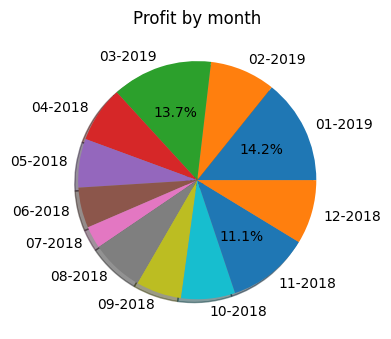

In [51]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots()

# Any slice below 10% does not receive a label

def autopct_format(value):
    if value < 10:
        return ''
    else:
        return '%1.1f%%' % value

plt.pie(country_profit['Amount'], labels = country_profit['Order Date'], shadow = True, autopct=autopct_format)
plt.title("Profit by month")

plt.tight_layout()
plt.show()

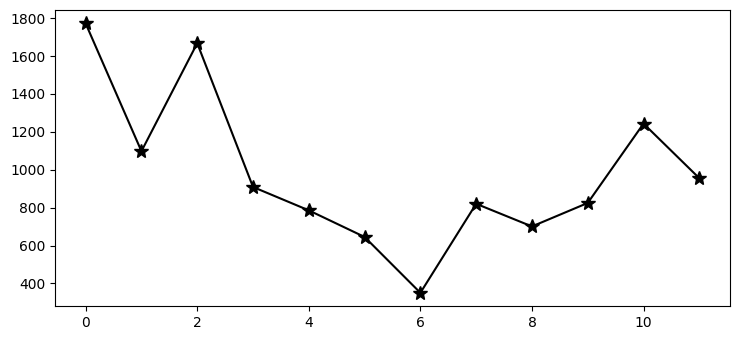

In [39]:
country_profit['percent_to_target'].plot(kind='line', marker='*', color='black', ms=10)
plt.show()